In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np
import matplotlib.pyplot as plt

In [55]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

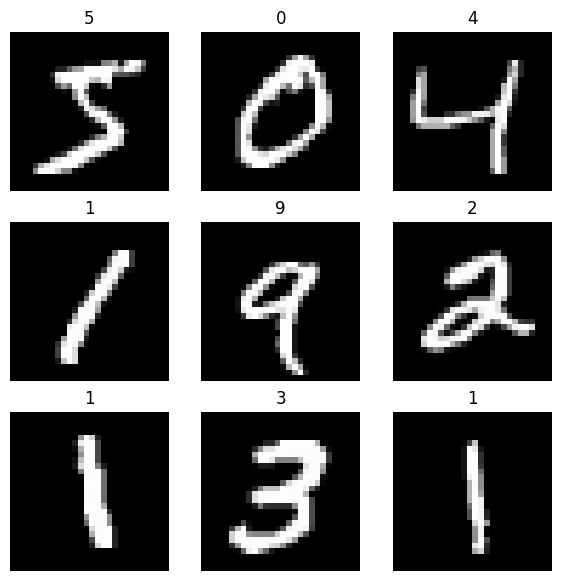

In [56]:
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap="gray")
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [57]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , x_train.shape[2]))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2]))

x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

x_train=np.stack((x_train,)*3,axis=-1)
x_test=np.stack((x_test,)*3,axis=-1)

print("Train data shape: ",x_train.shape ,",Test data shape:", x_test.shape)

Train data shape:  (60000, 28, 28, 3) ,Test data shape: (10000, 28, 28, 3)


In [58]:
model=tf.keras.Sequential()
model.add(ResNet50(include_top=False,pooling="avg",weights="imagenet"))
model.add(Dense(512,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.layers[0].trainable=False

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_14 (Dense)            (None, 512)               1049088   
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [59]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['acc'])

In [ ]:
model.fit(x_train,y_train,batch_size = 32 , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 224s 117ms/step - loss: 0.5318 - acc: 0.8331
Epoch 2/10
1875/1875 [==============================] - 228s 122ms/step - loss: 0.3131 - acc: 0.8980
Epoch 3/10
1875/1875 [==============================] - 373s 199ms/step - loss: 0.2724 - acc: 0.9114
Epoch 4/10
1875/1875 [==============================] - 698s 372ms/step - loss: 0.2384 - acc: 0.9220
Epoch 5/10
 873/1875 [============>.................] - ETA: 7:23 - loss: 0.2243 - acc: 0.9267

In [53]:
history=model.evaluate(x_test,y_test,verbose=0)
acc=history[1]*100
print("%.2f" % acc,"%")

92.62 %
